In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

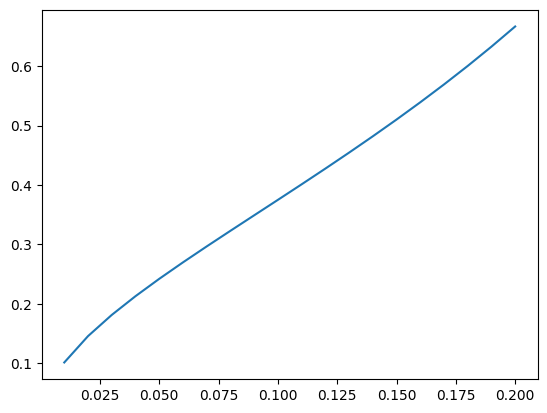

In [6]:
x = np.linspace(0.01, 0.20, 20)
var = np.sqrt(x * (1 - x) / np.power((1 - 2 * x), 2))
plt.plot(x, var)

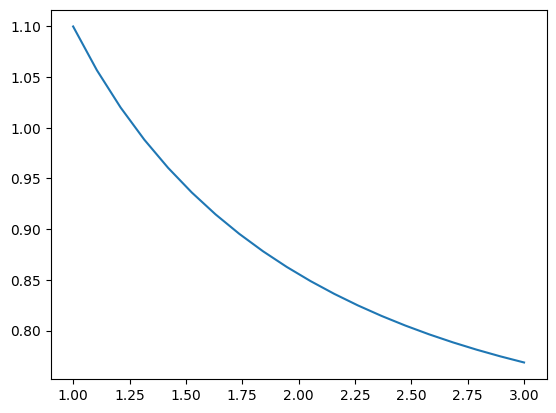

In [7]:
a = np.linspace(1, 3, 20)
x = 1.1
plt.plot(a, np.power(x, a) / np.sqrt(a))

In [8]:
def read_input(seed: int):
    with open(f"../tools/in/{seed:04}.txt", "r") as f:
        n, m, eps = f.readline().split()
        n, m, eps = int(n), int(m), float(eps)
        ds = []
        minos = []
        dense = 0
        for _ in range(m):
            s = f.readline().split()
            d, v = int(s[0]), list(map(int, s[1:]))
            v = [(v[2 * i], v[2 * i + 1]) for i in range(d)]
            ds.append(d)
            minos.append(v)
            dense += d
        dense /= n * n

    return n, m, eps, ds, minos, dense

In [9]:
data = []
for seed in range(10000):
    n, m, eps, ds, minos, dense = read_input(seed)
    data.append((f"tools/in/{seed:04}.txt", n, m, eps, dense))

In [10]:
df = pd.DataFrame(data, columns=["input_file", "n", "m", "eps", "dense"])
df.describe()

,n,m,eps,dense
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.008800,6.715300,0.105815,0.335912
std,3.157961,4.079376,0.057922,0.099314
min,10.000000,2.000000,0.010000,0.079585
25%,12.000000,4.000000,0.060000,0.253906
50%,15.000000,6.000000,0.110000,0.330000
75%,18.000000,9.000000,0.160000,0.410000
max,20.000000,20.000000,0.200000,0.768166


In [11]:
df.to_csv("../log/input.csv", index=False)

array([[<AxesSubplot:title={'center':'n'}>,
        <AxesSubplot:title={'center':'m'}>],
       [<AxesSubplot:title={'center':'eps'}>,
        <AxesSubplot:title={'center':'dense'}>]], dtype=object)

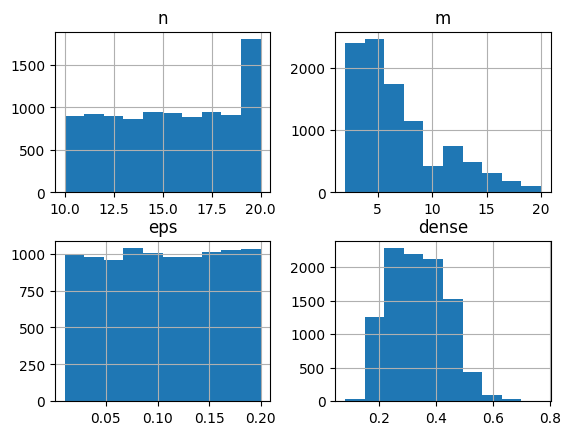

In [12]:
df.hist()

<AxesSubplot:xlabel='eps', ylabel='m'>

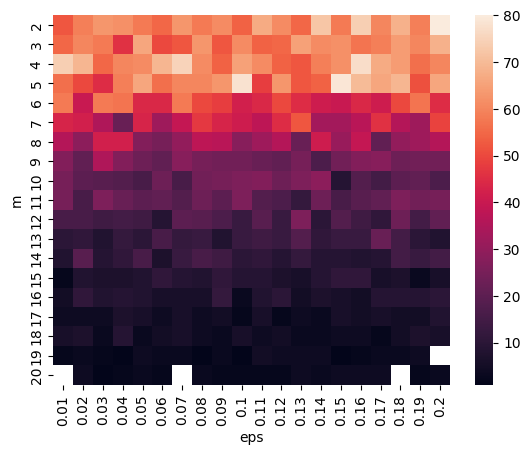

In [13]:
import seaborn as sns

sns.heatmap(df.pivot_table("n", index="m", columns="eps", aggfunc=len))